In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs
from scipy.interpolate import griddata
from xmip.preprocessing import rename_cmip6
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import gridspec
import matplotlib
import cartopy as cart

In [2]:
omega_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_wap_37model_piControl_2x2_last250.nc')
omega_cont.load()

omega_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_wap_34model_historical_2x2_last250.nc')
omega_hist.load()

tas_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_piControl_2x2_48mod_last250.nc')
tas_cont.load()

tas_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_43mod_historical_2x2.nc')
tas_hist.load()

ts_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_39model_piControl_2x2_last250.nc')
ts_cont.load()

ts_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_38model_historical_2x2.nc')
ts_hist.load()

land_mask = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_landmask_31model.nc')
land_mask.load()

<xarray.DataArray 'sftlf' (name: 31, lat: 88, lon: 179)>
array([[[100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [ 99.99997711,  99.99997711,  99.99998665, ..., 100.        ,
         100.        ,  99.99999809],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[         nan, 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [         nan, 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [         nan, 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
...
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        [100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])
Coordinates:
    type     |S4 b'land'
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GISS-E2-1-H' ... 'EC-Earth3-AerChem'
Attributes:
    cell_measures:    area: areacella
    cell_methods:     area: mean
    interp_method:    conserve_order1
    long_name:        Land Area Fraction
    ocean_fillvalue:  0.0
    original_name:    sftlf
    standard_name:    land_area_fraction
    units:            %

In [3]:
models = ['ACCESS-CM2','ACCESS-ESM1-5','BCC-CSM2-MR','BCC-ESM1','CAMS-CSM1-0','CanESM5','CESM2','CESM2-FV2','CESM2-WACCM',
          'CESM2-WACCM-FV2','CIESM','CMCC-CM2-SR5','CMCC-ESM2','EC-Earth3','EC-Earth3-AerChem','EC-Earth3-CC',
          'EC-Earth3-Veg-LR','FGOALS-f3-L','FGOALS-g3','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G','INM-CM4-8','INM-CM5-0',
          'IPSL-CM5A2-INCA','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NorCPM1','NorESM2-LM','NorESM2-MM','SAM0-UNICON',
          'TaiESM1']

omega_cont_trunc = omega_cont.sel(name=models)

omega_hist_trunc = omega_hist.sel(name=models)

tas_cont_trunc = tas_cont.sel(name=models)

tas_hist_trunc = tas_hist.sel(name=models)

ts_cont_trunc = ts_cont.sel(name=models)

ts_hist_trunc = ts_hist.sel(name=models)

In [4]:
ts_cont_rolling = ts_cont_trunc.rolling(time=120, center=True).mean('time')
ts_cont_std = ts_cont_rolling.std('time')
ts_cont_var = ts_cont_std.mean('name')
ts_cont_var

ts_hist_rolling = ts_hist_trunc.rolling(time=120, center=True).mean('time')
ts_hist_std = ts_hist_rolling.std('time')
ts_hist_var = ts_hist_std.mean('name')
ts_hist_var

tas_cont_rolling = tas_cont_trunc.rolling(time=120, center=True).mean('time')
tas_cont_std = tas_cont_rolling.std('time')
tas_cont_var = tas_cont_std.mean('name')
tas_cont_var

tas_hist_rolling = tas_hist_trunc.rolling(time=120, center=True).mean('time')
tas_hist_std = tas_hist_rolling.std('time')
tas_hist_var = tas_hist_std.mean('name')
tas_hist_var


ts_diff_var = ts_hist_var - ts_cont_var
ts_percent_var = ts_diff_var*100/ts_cont_var

tas_diff_var = tas_hist_var - tas_cont_var
tas_percent_var = tas_diff_var*100/tas_cont_var

In [5]:
omega_cont_mean = omega_cont_trunc.isel(time=slice(len(omega_cont.time)-(30*12),len(omega_cont.time))).mean('time').mean('name')

omega_hist_mean = omega_hist_trunc.isel(time=slice(len(omega_hist.time)-(30*12),len(omega_hist.time))).mean('time').mean('name')

In [6]:
mask = land_mask.mean('name')

In [7]:
omega_cont_mask = omega_cont_mean.where(mask<50)
omega_hist_mask = omega_hist_mean.where(mask<50)

ts_cont_mask = ts_cont_var.where(mask<50)
ts_hist_mask = ts_hist_var.where(mask<50)
ts_percent_mask = ts_percent_var.where(mask<50)

15752


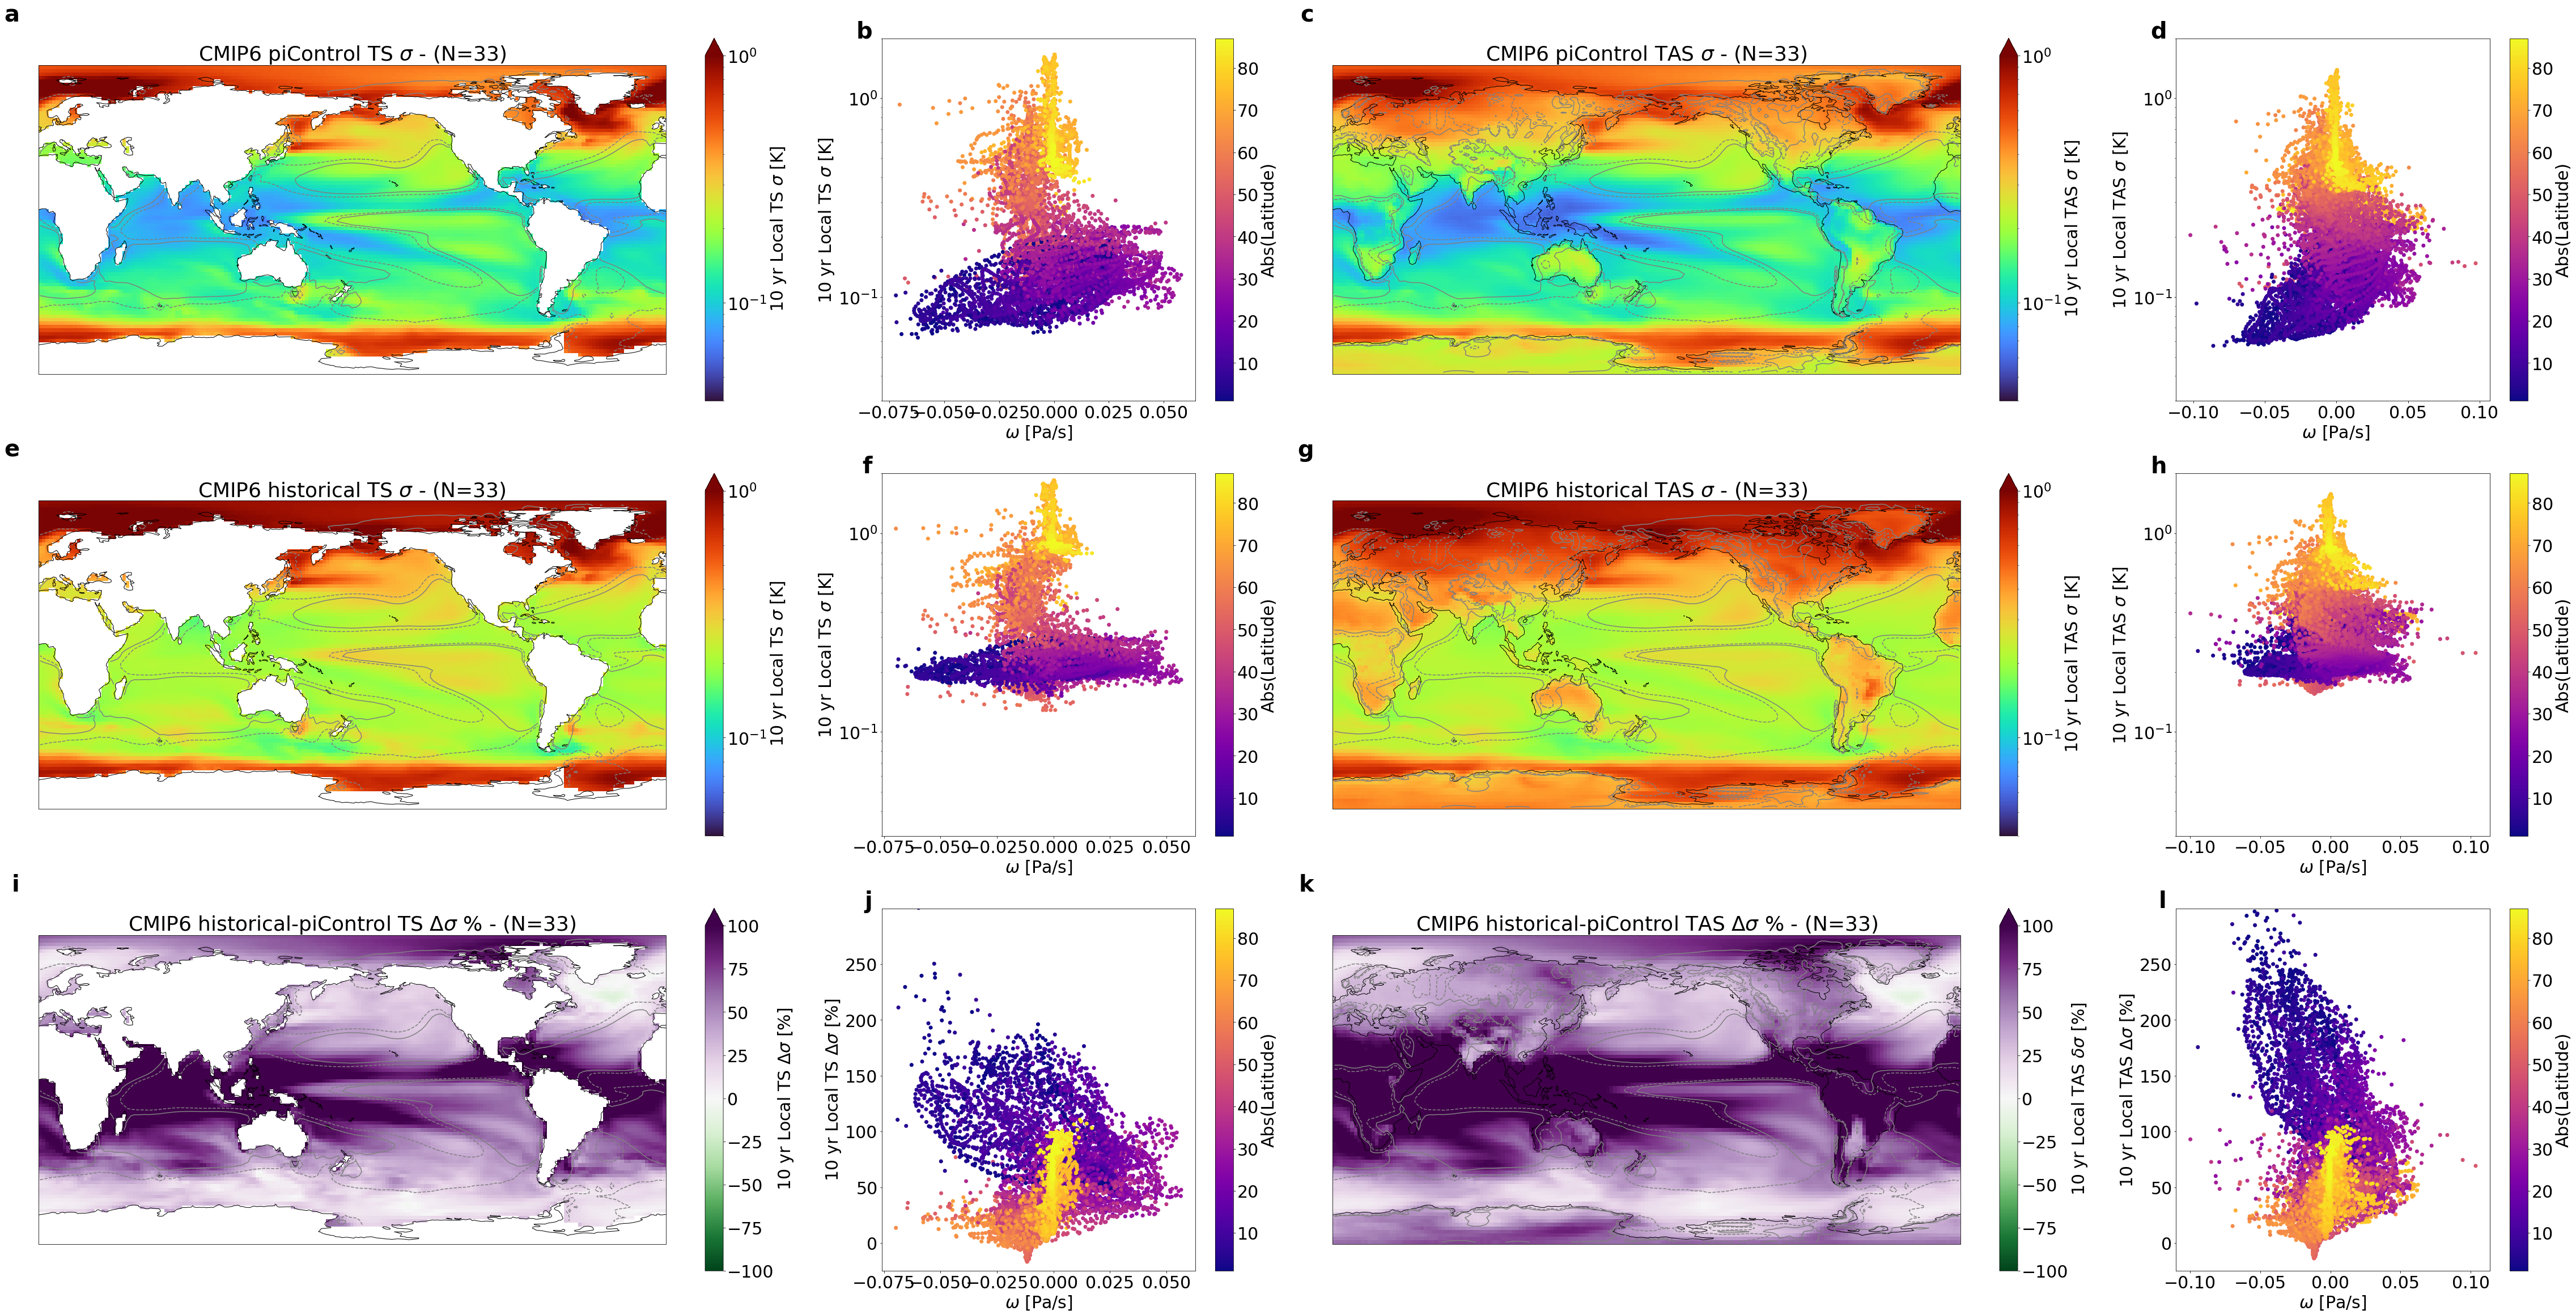

In [9]:
colored_lats = []
for latitude in ts_percent_var['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(abs(latitude))
print(len(colored_lats))


fig = plt.figure(figsize=(80, 40))
gs = gridspec.GridSpec(3, 4, width_ratios=[2,1,2,1])
gs.update(wspace=0.1)
#top=300
#bottom=270
font = {'size'   : 30,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
# https://stackoverflow.com/questions/36525825/mask-ocean-or-land-from-data-using-cartopy
#ax1.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ts_cont_mask.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TS $\sigma$ [K]",
                                                                  })
ax1.coastlines(color='black', linewidth=1)
omega_cont_mask.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.2, 'a', transform=ax1.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
plt.title(r'CMIP6 piControl TS $\sigma$ - (N=33)')

ax2 = fig.add_subplot(gs[1])
scatter_cont_ts = ax2.scatter(omega_cont_mask,ts_cont_mask,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_ts, ax=ax2)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax2.text(-0.03, 1.05, 'b', transform=ax2.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree(central_longitude=180))
# https://stackoverflow.com/questions/36525825/mask-ocean-or-land-from-data-using-cartopy
#ax3.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
tas_cont_var.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TAS $\sigma$ [K]",
                                                                  })
ax3.coastlines(color='black', linewidth=1)
omega_cont_mean.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax3.text(-0.03, 1.2, 'c', transform=ax3.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
plt.title(r'CMIP6 piControl TAS $\sigma$ - (N=33)')

ax4 = fig.add_subplot(gs[3])
scatter_cont_tas = ax4.scatter(omega_cont_mean,tas_cont_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_tas, ax=ax4)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TAS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r' $\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax4.text(-0.03, 1.05, 'd', transform=ax4.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax5 = fig.add_subplot(gs[4], projection=ccrs.PlateCarree(central_longitude=180))
ts_hist_mask.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TS $\sigma$ [K]",
                                                                  })
#ax5.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax5.coastlines(color='black', linewidth=1)
omega_hist_mask.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical TS $\sigma$ - (N=33)')
ax5.text(-0.03, 1.2, 'e', transform=ax5.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax6 = fig.add_subplot(gs[5])
scatter_hist_ts = ax6.scatter(omega_hist_mask,ts_hist_mask,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_ts, ax=ax6)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'historical TS $\sigma$ vs. historical $\omega$ - (N=33)')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax6.text(-0.03, 1.05, 'f', transform=ax6.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax7 = fig.add_subplot(gs[6], projection=ccrs.PlateCarree(central_longitude=180))
tas_hist_var.plot(ax=ax7, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TAS $\sigma$ [K]",
                                                                  })
#ax7.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax7.coastlines(color='black', linewidth=1)
omega_hist_mean.plot.contour(ax=ax7, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical TAS $\sigma$ - (N=33)')
ax7.text(-0.03, 1.2, 'g', transform=ax7.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax8 = fig.add_subplot(gs[7])
scatter_hist_tas = ax8.scatter(omega_hist_mean,tas_hist_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_tas, ax=ax8)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'historical TAS $\sigma$ vs. historical $\omega$ - (N=33)')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax8.text(-0.03, 1.05, 'h', transform=ax8.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax9 = fig.add_subplot(gs[8], projection=ccrs.PlateCarree(central_longitude=180))
ts_percent_mask.plot(ax=ax9, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100, 
                    cbar_kwargs={'label': r"10 yr Local TS $\Delta \sigma$ [%]",
                                 })
#ax9.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax9.coastlines(color='black', linewidth=1)
omega_hist_mask.plot.contour(ax=ax9, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical-piControl TS $\Delta \sigma$ % - (N=33)')
ax9.text(-0.03, 1.2, 'i', transform=ax9.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax10 = fig.add_subplot(gs[9])
scatter_percent_ts = ax10.scatter(omega_hist_mask, ts_percent_mask, c=colored_lats, cmap='plasma')
cbar = plt.colorbar(scatter_percent_ts, ax=ax10)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(-25,300)
#plt.title('historical-piControl TS $\Delta \sigma$ % vs. historical $\omega$ - (N=33)', fontsize=30)
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylabel(r'10 yr Local TS $\Delta \sigma$ [%]')
ax10.text(-0.03, 1.05, 'j', transform=ax10.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
ax10.set_yticks([0,50,100,150,200,250])

ax11 = fig.add_subplot(gs[10], projection=ccrs.PlateCarree(central_longitude=180))
tas_percent_var.plot(ax=ax11, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100,
                     cbar_kwargs={'label': r"10 yr Local TAS $\delta \sigma$ [%]",
                                  })
#ax11.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax11.coastlines(color='black', linewidth=1)
omega_hist_mean.plot.contour(ax=ax11, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical-piControl TAS $\Delta \sigma$ % - (N=33)')
ax11.text(-0.03, 1.2, 'k', transform=ax11.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')

ax12 = fig.add_subplot(gs[11])
scatter_percent_tas = ax12.scatter(omega_hist_mean, tas_percent_var, c=colored_lats, cmap='plasma')
cbar = plt.colorbar(scatter_percent_tas, ax=ax12)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(-25,300)
#plt.title('historical-piControl TAS $\Delta \sigma$ % vs. historical $\omega$ - (N=33)', fontsize=30)
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylabel(r'10 yr Local TAS $\Delta \sigma$ [%]')
ax12.text(-0.03, 1.05, 'l', transform=ax12.transAxes,
      fontsize=40, fontweight='bold', va='top', ha='right')
ax12.set_yticks([0,50,100,150,200,250])

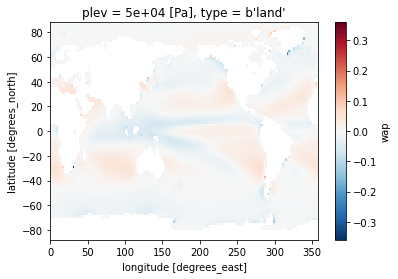

In [11]:
omega_cont_mask.mean('time').mean('name').plot()

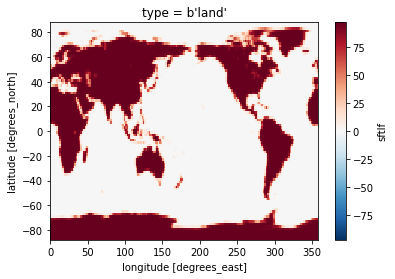

In [3]:
land_mask.mean('name').plot()